# Pandas Multi-Index

In [4]:
import numpy as np
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)

df
# tuples

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -1.250860 -0.934882 -2.293127  0.667804 -0.959854 -0.932413  0.129412   
B      -1.698972  2.062473 -0.874424  0.307809  0.442682 -0.868806 -0.397203   
C      -2.479306 -0.012575  0.436714 -0.547242  1.050080 -1.276076 -1.347907   

first             
second       two  
A      -1.708857  
B      -1.025766  
C       0.312522

In [5]:
df['bar']

second,one,two
A,-1.250860,-0.934882
B,-1.698972,2.062473
C,-2.479306,-0.012575


In [203]:
from enum import Enum


# class CurveType(Enum):
#     FreqRes = 'Frequency Response'
#     IMP = 'Impedance'
#     Phase = 'Phase'
class CurveType(Enum):
    FreqRes = 2
    IMP = 2
    Phase = 3

In [212]:
CurveType.IMP is not CurveType.Phase

True

# Import packages

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Target File

In [75]:
seq_csv_f = 'AP_Impedance_Sequence_all_csv.csv'
seq_xlsx_f = 'AP_Impedance_Sequence_all_xlsx.xlsx'
test_csv_f = 'AP_Impedance Magnitude_all_csv.csv'
test_xlsx_f = 'AP_Impedance Magnitude_all_xlsx.xlsx'

# Function Test

## Try read  csv file

In [101]:
f = open(test_csv_f, 'r')

full_data = f.read()

data_slice = full_data.split('\n\n')
len(data_slice)

curveData_csv = []
for _d in data_slice[:-2]:
    if (not _d or "Summary" in _d): continue
    data = pd.read_csv(io.StringIO(_d))
    title = data.columns[0]
    note = data.columns[1]
    curves = data.iloc[0, [i%2==0 for i in range(len(data.columns))]].values.tolist()
    curves = ['Frequency'] + curves
    data = data.iloc[3:, [i%2==1 or i==0 for i in range(len(data.columns))]]
    data.columns = curves
    curveData_csv.append(data)

print(curveData_csv[0])

            Frequency       Unprocessed               Fit
3    19.2307692307692  1.85012176785299  2.02753106305494
4    20.8333333333333  1.86000202967639  2.02835197605674
5    22.4358974358974  1.87175386929235  2.02935081143049
6    24.0384615384615  1.88469705877908  2.03057418929259
7    25.6410256410256  1.89858272811716  2.03208505679162
..                ...               ...               ...
715  19546.4743589744  4.86384614311273  4.55732301006118
716  19548.0769230769  4.87231658124759  4.55762297612151
717  19847.7564102564  4.90803461868606  4.61380082712781
718   19849.358974359  4.90848619943834  4.61410168815796
719             20000  4.92854622331426  4.64240336302376

[717 rows x 3 columns]


## Try read xlsx file

In [103]:
import warnings
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    data = pd.read_excel(test_xlsx_f, engine="openpyxl", sheet_name=None)

del data['Summary']
data

{'Impedance Magnitude':     Impedance Magnitude TCBar-S_#1    Unnamed: 2 Unnamed: 3
 0           Unprocessed        NaN           Fit        NaN
 1                     X          Y             X          Y
 2                    Hz        ohm            Hz        ohm
 3             19.230769   1.850122     19.230769   2.027531
 4             20.833333   1.860002     20.833333   2.028352
 ..                  ...        ...           ...        ...
 728        19556.089744   4.873561  19556.089744   4.559123
 729        19557.692308   4.873126  19557.692308   4.559423
 730        19850.961538   4.908796  19850.961538   4.614403
 731        19852.564103   4.909031  19852.564103   4.614703
 732               20000   4.928546         20000   4.642403
 
 [733 rows x 4 columns],
 'Impedance Magnitude (1)':     Impedance Magnitude TCBar-S_#2    Unnamed: 2 Unnamed: 3
 0           Unprocessed        NaN           Fit        NaN
 1                     X          Y             X          Y
 2      

Impedance Magnitude


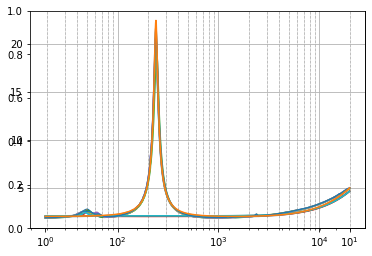

In [157]:
fig, _ = plt.subplots()
myPlotDict = {'main': fig.axes[0]}

df = {}
for key, value in data.items():
    title = data[key].columns[0]
    if title in df: pass
    else: df[title] = []
    
    note = data[key].columns[1] 
    curveDatas = []
    for curveIndex in range(int(len(data[key].columns)/2)):
        label = data[key].iloc[0, curveIndex*2]
        curve_x = pd.Series(data[key].iloc[3:, curveIndex*2], name='x', dtype=float)
        curve_y = pd.Series(data[key].iloc[3:, curveIndex*2+1], name='y')
        curveDatas.append(curveData(label, note, curve_x, curve_y))
    df[title].extend(curveDatas)

for title, cruvesArr in df.items():
    print(title)
    fig.add_subplot(111)
    myPlotDict[title] = fig.axes[len(fig.axes) - 1]
    for it in cruvesArr:
        if (it.xdata.dtype == float):
            myPlotDict[title].plot(it.xdata, it.ydata, label=it.label)

setStyle(myPlotDict)

fig.canvas.draw()
# myPlotDict["Impedance Magnitude"].legend(frameon=False, loc='lower center', ncol=2)

# Furnish Functions

### Define Curve Object

In [168]:
class curveData:
    def __init__(self, label, note, xdata, ydata):
        self.label = label
        self.note = note
        self.xdata = xdata
        self.ydata = ydata
    def set_line(self, line):
        self.line = line

### Graph Style

In [156]:
x_lim = [20,20000]
y_lim = [0, 30]


def setStyle(myPlotDict):
    for key in myPlotDict.keys():
        ax = myPlotDict[key]
        ax.set_xscale('log')
        ax.set_xlim(auto=True)
        ax.set_ylim(auto=True)
        ax.grid()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def setAxStyle(ax):
    ax.set_xscale('log')
    ax.set_xlim(auto=True)
    ax.set_ylim(auto=True)
    ax.grid()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

### Import data and plot

In [269]:
import warnings

dataSequence = {}

def get_csv_allMeasurement(path):
    with warnings.catch_warnings(record=True):
        warnings.simplefilter("always")
        data = pd.read_excel(path, engine="openpyxl", sheet_name=None)
    del data['Summary']
    
    for key, value in data.items():
#         print(key, value)
        title = data[key].columns[0]
        if title in dataSequence: pass
        else: dataSequence[title] = []

        note = data[key].columns[1] 
        curveDatas = []
        for curveIndex in range(int(len(data[key].columns)/2)):
            label = data[key].iloc[0, curveIndex*2]
            print(label)
            curve_x = pd.Series(data[key].iloc[3:, curveIndex*2], name='x', dtype=float)
            curve_y = pd.Series(data[key].iloc[3:, curveIndex*2+1], name='y', dtype=float)
            print(curve_x.dtype != float, curve_y.dtype == float)
            curveDatas.append(curveData(label, note, curve_x, curve_y))
        dataSequence[title].extend(curveDatas)
        

def plot(dataSequence):
    for title, cruvesArr in dataSequence.items():
        fig.add_subplot(111)
        myPlotDict[title] = fig.axes[len(fig.axes) - 1]
        for it in cruvesArr:
            if (it.xdata.dtype == float):
                print(title)  
                myPlotDict[title].plot(it.xdata, it.ydata, label=it.label)
    setStyle(myPlotDict)

def plotOne(dataSeqence, title, ax):
    for it in dataSequence[title]:
        if (it.xdata.dtype == float):
            ax.plot(it.xdata, it.ydata, label=it.label)
    setAxStyle(ax)
    

### Test

Unprocessed
False True
Fit
False True
Unprocessed
False True
Fit
False True
Unprocessed
False True
Fit
False True
Unprocessed
False True
Fit
False True
Unprocessed
False True
Fit
False True
Unprocessed
False True
Fit
False True
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude
Impedance Magnitude


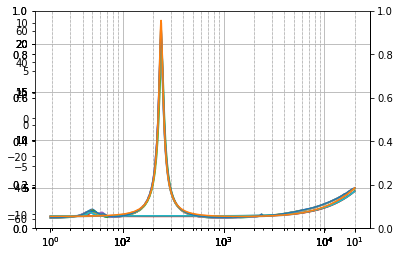

In [270]:
get_csv_allMeasurement(test_xlsx_f)
plot(dataSequence)
fig

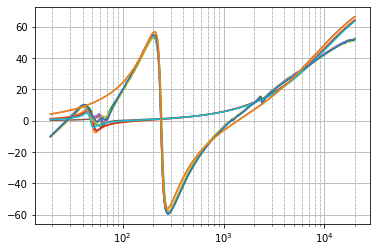

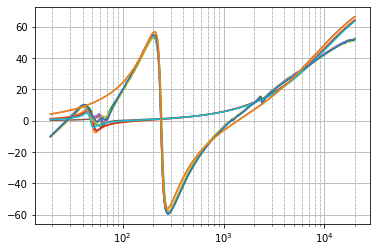

In [151]:
fig_Phase, _ = plt.subplots()
get_csv_allMeasurement(seq_xlsx_f)
plotOne(dataSequence, 'Impedance Phase', fig_Phase.axes[0])

fig_Phase

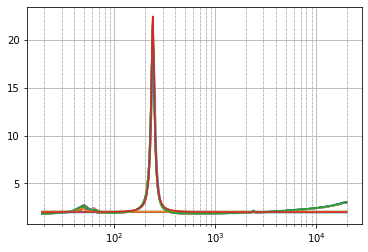

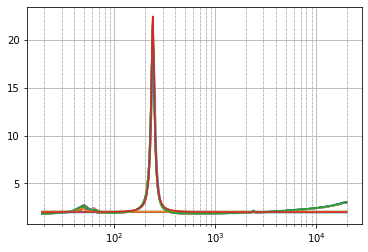

In [152]:
fig_Real, _ = plt.subplots()
get_csv_allMeasurement(seq_xlsx_f)
plotOne(dataSequence, 'Impedance Real', fig_Real.axes[0])

fig_Real

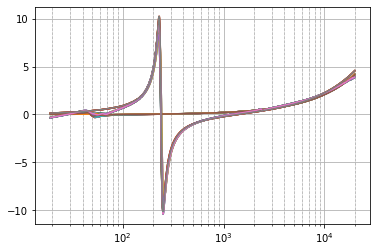

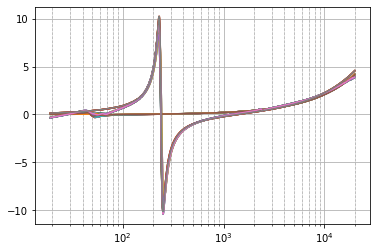

In [154]:
fig_Img, _ = plt.subplots()
get_csv_allMeasurement(seq_xlsx_f)
plotOne(dataSequence, 'Impedance Imaginary', fig_Img.axes[0])

fig_Img

Line2D(_line0)
True
Line2D(_line0)
Line2D(_line1)


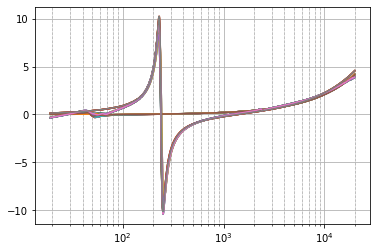

In [191]:
from matplotlib.lines import Line2D
fig_main, _ = plt.subplots()
lines = []
for it in dataSequence['Impedance Imaginary']:
    if (it.xdata.dtype == float):
        line, = fig_main.axes[0].plot(it.xdata, it.ydata)
        it.line = line
#         lines.extend(line)

        
setAxStyle(fig_main.axes[0])

print(fig_main.axes[0].lines[0])
print(fig_main.axes[0].lines[0] is dataSequence['Impedance Imaginary'][0].line)
print(dataSequence['Impedance Imaginary'][0].line)
print(fig_main.axes[0].lines[1])

In [218]:
fig.axes

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]